In [1]:
import os
import sys
BASE_DIR = os.getcwd()
PARENT_DIR = os.path.abspath(os.path.join(BASE_DIR, os.path.pardir))
sys.path.append(PARENT_DIR)
sys.path.append(BASE_DIR)
from dataset.dataset import WhatsCookingStemmedSeparatedDataset
from base_solver import BaseSolver
from base_data_processor import BaseDataProcessor

from SVM import SVC_solver
from sklearn.feature_extraction.text import TfidfVectorizer
import importlib  # for reloading module

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# dataset loading
dataset_stemmed = WhatsCookingStemmedSeparatedDataset(stem=False, file_path='../dataset/train.json')
train_x_stemmed = dataset_stemmed.cuisines

train_y_stemmed = [
    dataset_stemmed.cuisine2id[cuisine.cuisine] 
    for cuisine in dataset_stemmed.cuisines
]

  0%|          | 0/39774 [00:00<?, ?it/s]

Loading and stemming separated What's Cooking training dataset ...


100%|██████████| 39774/39774 [00:24<00:00, 1624.46it/s]

Successfully loaded stemmed and separated What's Cooking training dataset!
# of cuisines = 20; # of ingredients = 3082


In [3]:
# pre-processing
train_as_text = [' '.join(cuisine.ingredients).lower() for cuisine in dataset_stemmed.cuisines]
tfidf_enc = TfidfVectorizer(binary=True)
train_x_tfidf = tfidf_enc.fit_transform(train_as_text).astype('float16')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    train_x_tfidf.astype('float64'), train_y_stemmed, test_size=0.2, random_state=0)

# training and testing
s = SVC_solver.SVCSolver(dataset_stemmed, method='svc_ovr')
s.train(X_train, y_train)
ypred = s.clf.predict(X_test)

Training started...
training time: 313.5684063434601 seconds
training score: 0.9995914390772809
Saving model...


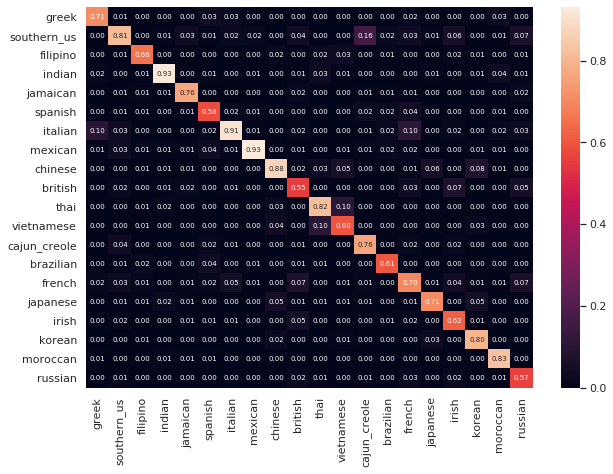

In [6]:
conf_matrix = confusion_matrix(y_test, ypred)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

df_cm = pd.DataFrame(conf_matrix, dataset_stemmed.id2cuisine, dataset_stemmed.id2cuisine)
plt.figure(figsize = (10,7))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 7}, fmt='.2f')# font size

plt.savefig('confusion_matrix.eps', format='eps')
plt.show()